# Merge to single Dataframe

In [44]:
import pandas as pd
import seaborn as sns
import glob
%matplotlib inline

## TODO
### Check for missing data
### Write function that evaluates each model for each currency

In [67]:
df = pd.read_pickle('/home/patrick/Documents/Alt Coin Proj/data/doge.pkl')

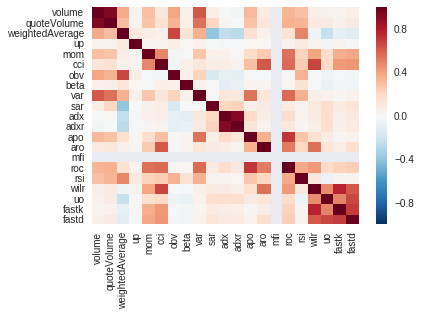

In [68]:
df = df.drop(['high','low', 'open', 'close'],axis=1)
sns.heatmap(df.corr())

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [69]:

crypt = df
trainX = crypt[crypt['up'].first_valid_index():'2017-01-01 00:00:00'].drop('up',axis=1)
trainY = crypt[crypt['up'].first_valid_index():'2017-01-01 00:00:00']['up']
testX = crypt['2017-01-01 04:00:00':crypt['up'].last_valid_index()].drop('up',axis=1)
testY = crypt['2017-01-01 04:00:00':crypt['up'].last_valid_index()]['up']

print  'LTC  Logistic Regression'

logmodel = LogisticRegression()
logmodel.fit(trainX,trainY)
pred = logmodel.predict(testX)
print classification_report(testY,pred)
print confusion_matrix(testY,pred)



LTC  Logistic Regression
             precision    recall  f1-score   support

        0.0       0.71      0.64      0.67       834
        1.0       0.40      0.47      0.43       416

avg / total       0.60      0.58      0.59      1250

[[537 297]
 [222 194]]


In [74]:

crypt = df
trainX = crypt[crypt['up'].first_valid_index():'2017-01-01 00:00:00'].drop('up',axis=1)
trainY = crypt[crypt['up'].first_valid_index():'2017-01-01 00:00:00']['up']
testX = crypt['2017-01-01 04:00:00':crypt['up'].last_valid_index()].drop('up',axis=1)
testY = crypt['2017-01-01 04:00:00':crypt['up'].last_valid_index()]['up']

print 'LTC SVC'



param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid.fit(trainX,trainY)
grid.best_estimator_
grid_predictions = grid.predict(testX)
print classification_report(testY,grid_predictions)
print confusion_matrix(testY,grid_predictions)

LTC SVC
             precision    recall  f1-score   support

        0.0       0.67      1.00      0.80       834
        1.0       0.00      0.00      0.00       416

avg / total       0.45      0.67      0.53      1250

[[834   0]
 [416   0]]


In [71]:

crypt = df
trainX = crypt[crypt['up'].first_valid_index():'2017-01-01 00:00:00'].drop('up',axis=1)
trainY = crypt[crypt['up'].first_valid_index():'2017-01-01 00:00:00']['up']
testX = crypt['2017-01-01 04:00:00':crypt['up'].last_valid_index()].drop('up',axis=1)
testY = crypt['2017-01-01 04:00:00':crypt['up'].last_valid_index()]['up']

print  'LTC Tree'

model = DecisionTreeClassifier()
model.fit(trainX,trainY)
pred = model.predict(testX)
print classification_report(testY,pred)
print confusion_matrix(testY,pred)

LTC Tree
             precision    recall  f1-score   support

        0.0       0.67      0.55      0.60       834
        1.0       0.33      0.44      0.38       416

avg / total       0.55      0.52      0.53      1250

[[462 372]
 [232 184]]
